In [121]:
import pandas as pd 
from statsmodels.tsa.arima_model import ARMA, ARMAResults
from pandas.io.json import json_normalize
import sklearn.model_selection
from statsmodels.tsa.ar_model import AR
from sklearn.model_selection import train_test_split
import numpy as np 

In [116]:
# Import refugee data 
# DRC



df_all = pd.read_json("data/refugees from south-sudan all.json")
df_all = json_normalize((df.loc['timeseries', 'data']))
df_all['data_date'] = pd.to_datetime(df_drc['data_date'])
df_all['data_date'] = df_all['data_date'] + pd.offsets.MonthBegin(0)
df_all['data_date'] = df_all['data_date'].dt.strftime('%Y-%m')

df = pd.read_json("data/refugees to DRC.json")
df_drc = json_normalize((df.loc['timeseries', 'data']))
df_drc['data_date'] = pd.to_datetime(df_drc['data_date'])
df_drc['data_date'] = df_drc['data_date'] + pd.offsets.MonthBegin(0)
df_drc['data_date'] = df_drc['data_date'].dt.strftime('%Y-%m')

# Ethiopa
df = pd.read_json("data/refugees to Ethiopia.json")
df_ethiopia = json_normalize((df.loc['timeseries', 'data']))
df_ethiopia['data_date'] = pd.to_datetime(df_ethiopia['data_date'])
df_ethiopia['data_date'] = df_ethiopia['data_date'] + pd.offsets.MonthBegin(0)
df_ethiopia['data_date'] = df_ethiopia['data_date'].dt.strftime('%Y-%m')

# Kenya
df = pd.read_json("data/refugees to Kenya.json")
df_kenya = json_normalize((df.loc['timeseries', 'data']))
df_kenya['data_date'] = pd.to_datetime(df_kenya['data_date'])
df_kenya['data_date'] = df_kenya['data_date'] + pd.offsets.MonthBegin(0)
df_kenya['data_date'] = df_kenya['data_date'].dt.strftime('%Y-%m')

# Sudan
df = pd.read_json("data/refugees to Sudan.json")
df_sudan = json_normalize((df.loc['timeseries', 'data']))
df_sudan['data_date'] = pd.to_datetime(df_sudan['data_date'])
df_sudan['data_date'] = df_sudan['data_date'] + pd.offsets.MonthBegin(0)
df_sudan['data_date'] = df_sudan['data_date'].dt.strftime('%Y-%m')

# Uganda,
df = pd.read_json("data/refugees to Uganda.json")
df_uganda = json_normalize((df.loc['timeseries', 'data']))
df_uganda['data_date'] = pd.to_datetime(df_uganda['data_date'])
df_uganda['data_date'] = df_uganda['data_date'] + pd.offsets.MonthBegin(0)
df_uganda['data_date'] = df_uganda['data_date'].dt.strftime('%Y-%m')

dates = pd.concat([df_drc[['data_date']],df_ethiopia[['data_date']],df_kenya[['data_date']],df_sudan[['data_date']], df_uganda[['data_date']] ])

# dates = dates['data_date'].drop_duplicates().sort_values()

# df_uganda.head()



df_all.head()



,data_date,individuals,unix_timestamp
0,2014-11,12524,1356912000
1,2014-12,25274,1388448000
2,2015-01,118051,1396224000
3,2015-02,142766,1404086400
4,2015-03,150181,1412035200


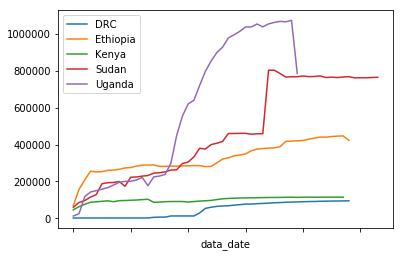

In [48]:
plt = df_drc.plot(x='data_date', y='individuals')

plt = df_ethiopia.plot(x='data_date', y='individuals', ax=plt)

plt = df_kenya.plot(x='data_date', y='individuals', ax=plt)

plt = df_sudan.plot(x='data_date', y='individuals', ax=plt)

plt = df_uganda.plot(x='data_date', y='individuals', ax=plt)

plt.legend(['DRC', 'Ethiopia', 'Kenya', 'Sudan', 'Uganda'])

df_combined = [df_drc, df_ethiopia, df_kenya, df_sudan, df_uganda]

In [8]:
df_incidents = pd.read_csv("data/incidents.csv", delimiter=';')
df_incidents['fatalities'] = df_incidents.fatalities.fillna(0)
df_incidents['event_date'] = pd.to_datetime(df_incidents['event_date'])

df_incidents.head()


,event_id_no_cnty,event_date,event_type,actor1,inter1,actor2,inter2,country,location,fatalities
0,5333.0,2018-09-11,Violence against civilians,Aluakluak Communal Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Akot,2.0
1,5332.0,2018-06-11,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Wau,1.0
2,5330.0,2018-02-11,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,2.0,Government of South Sudan (2011-),1.0,South Sudan,Juba,0.0
3,5331.0,2018-02-11,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Tirangore,0.0
4,5328.0,2018-10-31,Violence against civilians,Murle Ethnic Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Jalle,0.0


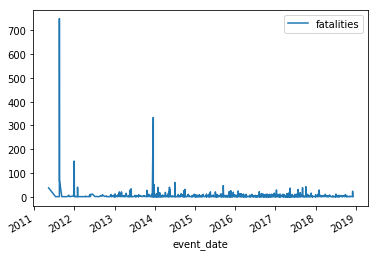

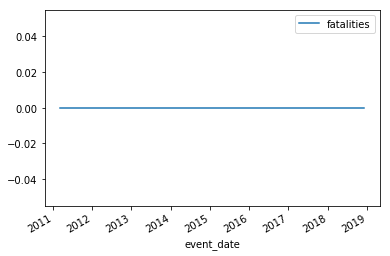

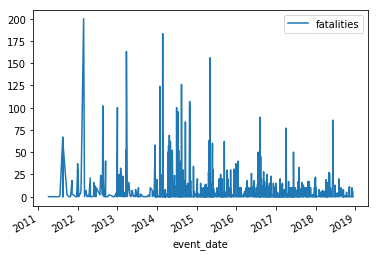

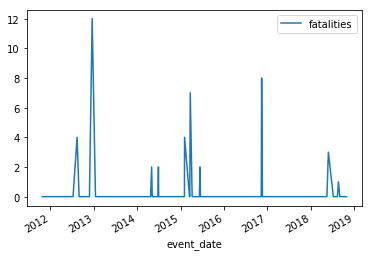

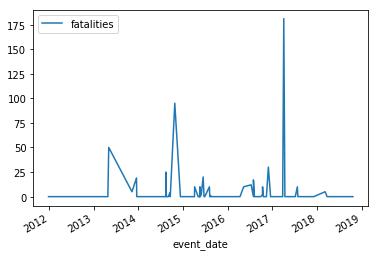

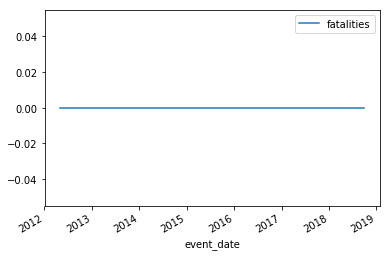

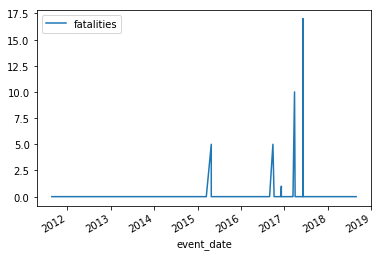

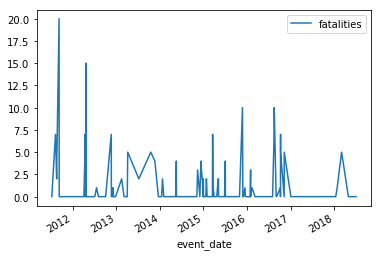

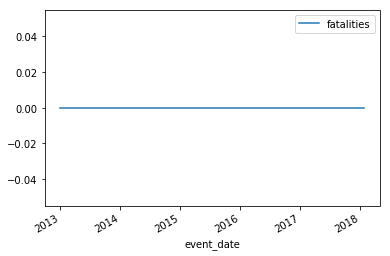

In [9]:
arr_event = []
for item in pd.unique(df_incidents['event_type']):
    df_tmp = df_incidents.loc[df_incidents['event_type'] == item]
    arr_event.append(df_tmp)
    
for item in arr_event:
    item.plot(x='event_date', y='fatalities')


In [10]:
df_incidents['event_date'] = pd.to_datetime(df_incidents['event_date'])
df_incidents['event_date'] = df_incidents['event_date'] + pd.offsets.MonthBegin(0)
df_incidents['event_date'] = df_incidents['event_date'].dt.strftime('%Y-%m')

df_incidents.head()

,event_id_no_cnty,event_date,event_type,actor1,inter1,actor2,inter2,country,location,fatalities
0,5333.0,2018-10,Violence against civilians,Aluakluak Communal Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Akot,2.0
1,5332.0,2018-07,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Wau,1.0
2,5330.0,2018-03,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,2.0,Government of South Sudan (2011-),1.0,South Sudan,Juba,0.0
3,5331.0,2018-03,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Tirangore,0.0
4,5328.0,2018-11,Violence against civilians,Murle Ethnic Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Jalle,0.0


In [218]:
df_agg  = df_incidents[['event_date', 'fatalities']]
# df_agg2 = df_agg.groupby('event_date').sum()
# df_agg2.head()
# # df_agg2.plot()

df_agg  = df_incidents[['event_date', 'fatalities']]

#df_agg3 = df_agg

#df_agg3['fatalities'] = pd.Series.cumsum(df_agg3['fatalities'])

#df_agg3.plot()


df_agg2 = df_agg.groupby('event_date').sum()


df_agg2['fatalities'] = pd.Series.cumsum(df_agg2['fatalities'])


# df_agg2['fatalities'] = df_agg2['fatalities'] / df_agg2['fatalities'].max()

#df_agg2['event_date'] = pd.to_datetime(df_agg2['event_date'])

df_agg2.reset_index(inplace=True)
#df_agg2.plot(x='event_date', y='fatalities')
df_agg2['event_date'] = pd.to_datetime(df_agg2['event_date'])
# df_agg2

,event_date,fatalities
0,2011-04-01,0.0
1,2011-05-01,0.0
2,2011-06-01,37.0
3,2011-08-01,38.0
4,2011-09-01,1438.0
5,2011-10-01,1460.0
6,2011-11-01,1460.0
7,2011-12-01,1489.0
8,2012-01-01,1683.0
9,2012-02-01,1797.0


In [94]:
# Import food data
df_food = pd.read_csv("data/wfp_food_prices_south-sudan.csv")
df_food = df_food.drop(df_food.index[0])
df_food['date'] = pd.to_datetime(df_food['date'])
df_food['date'] = df_food['date'] + pd.offsets.MonthBegin(0)
df_food['date'] = df_food['date'].dt.strftime('%Y-%m')
df_food['date'] = pd.to_datetime(df_food['date'])
df_food['price'] = pd.to_numeric(df_food['price'])
#df_food['cmname'] = df_food['cmname'].astype('|S')

df_food

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2012-02-01,Fuel (diesel) - Retail,L,non-food,7.9063,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
2,2012-03-01,Fuel (diesel) - Retail,L,non-food,7.2750,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
3,2012-04-01,Fuel (diesel) - Retail,L,non-food,7.4531,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
4,2012-05-01,Fuel (diesel) - Retail,L,non-food,8.1719,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
5,2012-06-01,Fuel (diesel) - Retail,L,non-food,11.9688,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
6,2012-07-01,Fuel (diesel) - Retail,L,non-food,10.2656,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
7,2012-08-01,Fuel (diesel) - Retail,L,non-food,10.3438,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
8,2012-09-01,Fuel (diesel) - Retail,L,non-food,10.8125,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
9,2012-10-01,Fuel (diesel) - Retail,L,non-food,10.1250,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
10,2012-11-01,Fuel (diesel) - Retail,L,non-food,10.6875,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN


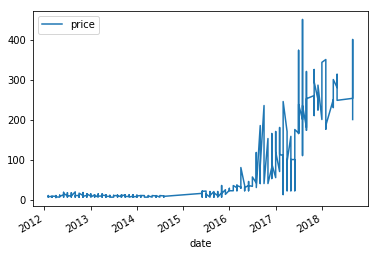

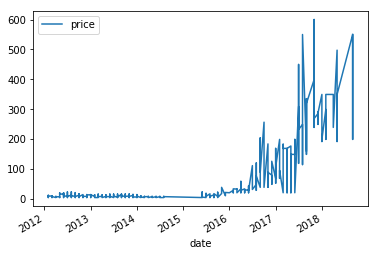

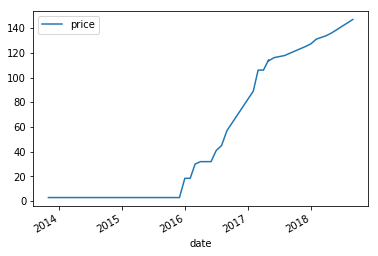

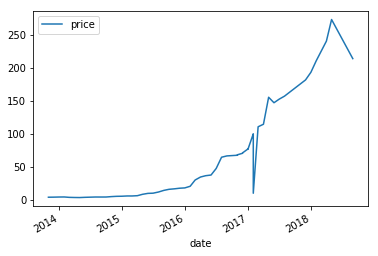

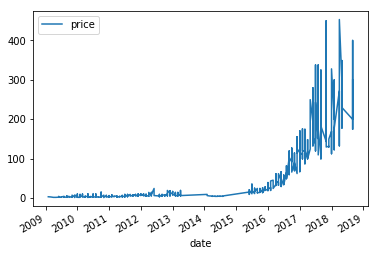

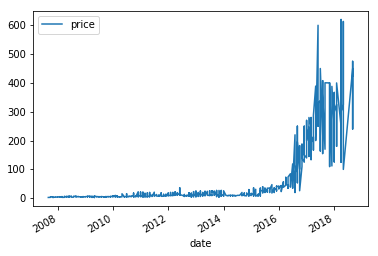

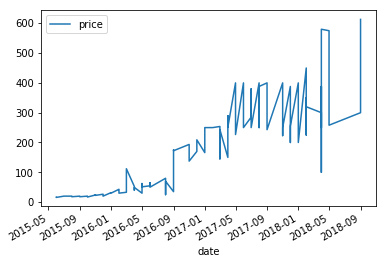

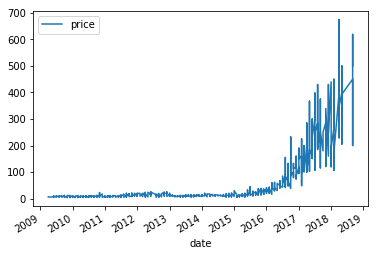

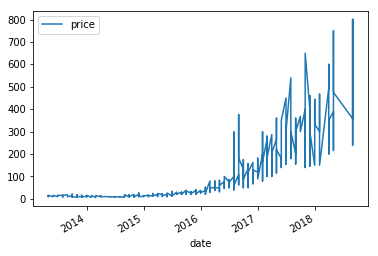

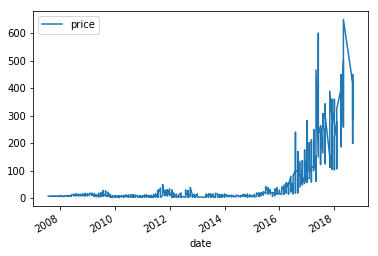

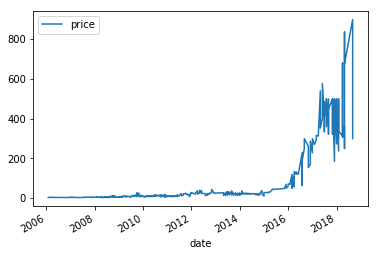

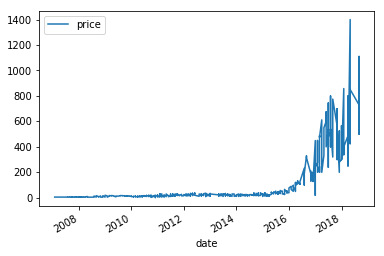

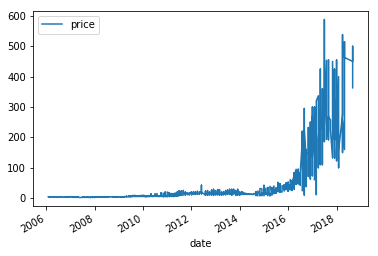

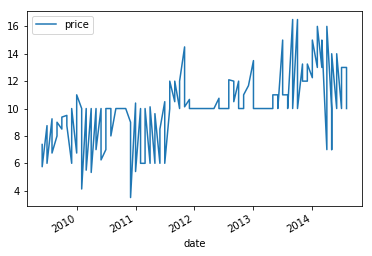

In [96]:
foodarray = []
for item in pd.unique(df_food['cmname']):
    df_tmp = df_food.loc[df_food['cmname'] == item]
    if df_tmp.shape[0] > 50:
        foodarray.append(df_tmp)
    
for item in foodarray:
    item.plot(x='date', y='price')

#fig, ax = plt.subplots()





,date,price
106,2015-01-01,14.027907
107,2015-02-01,15.650000
108,2015-03-01,15.648649
109,2015-04-01,15.088889
110,2015-05-01,20.231000
111,2015-06-01,20.632258
112,2015-07-01,23.021667
113,2015-08-01,23.743443
114,2015-09-01,24.337705
115,2015-10-01,23.480508


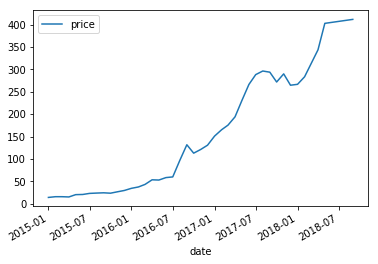

In [136]:
# Food assumptions: All different types of food are eaten equally

normalized_foods = []

for item in pd.unique(df_food['cmname']):
    df_tmp = df_food.loc[df_food['cmname'] == item]
    if df_tmp.shape[0] > 120:
#         df_tmp['price'] = df_tmp['price']/df_tmp['price'].max()
        normalized_foods.append(df_tmp)
        

df_norm = pd.concat(normalized_foods)

df_norm = df_norm[['date', 'price']]
df_norm = df_norm.groupby(['date']).mean()
df_norm.reset_index(inplace=True)
df_norm['date'] = pd.to_datetime(df_norm['date'], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))
df_norm['date'] = pd.to_datetime(df_norm['date'])
df_norm = df_norm.loc[df_norm['date'] > '2014-12']
df_norm.plot(x='date', y='price')

df_norm

,data_date,individuals
0,2014-11-01,12524
1,2014-12-01,25274
2,2015-01-01,118051
3,2015-02-01,142766
4,2015-03-01,150181
5,2015-04-01,157883
6,2015-05-01,166750
7,2015-06-01,180491
8,2015-07-01,195715
9,2015-08-01,200274


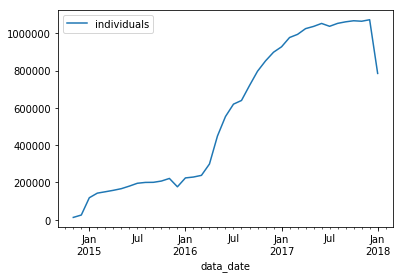

In [135]:

        

df_comb_norm = df_all

df_comb_norm = df_comb_norm[['data_date', 'individuals']]
df_comb_norm = df_comb_norm.groupby(['data_date']).mean()
df_comb_norm.reset_index(inplace=True)
df_comb_norm['data_date'] = pd.to_datetime(df_comb_norm['data_date'])
# df_comb_norm = df_comb_norm.loc[df_comb_norm['data_date'] > '2014-12']
# df_comb_norm['individuals'] = df_comb_norm['individuals']/df_comb_norm['individuals'].max()

df_comb_norm.plot(x='data_date', y='individuals')

df_comb_norm


In [195]:
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat


# # split dataset
# # train autoregression
# train = np.array(df_norm['price'])
# model = AR(train)
# model_fit = model.fit(maxlag=20, disp=False)
# window = model_fit.k_ar
# coef = model_fit.params
# # walk forward over time steps in test
# history = [train[i] for i in range(len(train))]
# predictions = list()
# for t in range(len(train)):
#     yhat = predict(coef, history)
#     obs = train[t]
#     predictions.append(yhat)
#     history.append(obs)
# # error = mean_squared_error(test, predictions)
# # print('Test MSE: %.3f' % error)
# # plot

# plt.plot(train)
# plt.plot(predictions, color='red')
# # plt.show()

# print(train)
# print(predictions)


# Predict series
# intshow = 400
# intpredicts = len(df_norm['price'])
# intpred = len(df_norm['price'])
# start = 0
# model = ARMA(df_norm['price'], order=(5,0))
# model_fit = model.fit(disp=0)
# predicts = model_fit.predict(0, intpred-1)
# plt.figure(figsize=(20,5))
# # plt.plot(df.head(intshow).index, df['L_T1'].head(intshow))
# plt.plot(df.head(intshow).index, predicts[:])


# # print("MFE = ", mean_forecast_err( df[feature], predicts))
# # print("MAE = ", mean_absolute_err( df[feature], predicts))
# # stats.normaltest(model_fit.resid)

# arma_results = ARMAResults(model,model_fit.params)
# predictions = arma_results.predict(start, intpredicts, df2[' ' + feature])

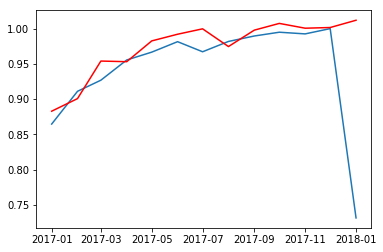

In [227]:
# df_comb_norm individuals
# df_norm food price
from statsmodels.tsa.ar_model import AR

df_people = df_comb_norm.rename(columns={"data_date" : "date"})
df_inc = df_agg2.rename(columns={"event_date" : "date"})
# df_norm
df_new = df_people.merge(right=df_norm, on='date' )
df_new = df_new.merge(right=df_inc, on='date' )

df_new['individuals'] = df_new['individuals']/df_new['individuals'].max()
df_new['price'] = df_new['price']/df_new['price'].max()

# order_p = 5
# # model = ARMA(df_new['price'], order=(order_p,0))
# model=AR(df_new['price'])
# model_fit = model.fit(disp=0)
# arma_results = ARMAResults(model,model_fit.params)
# predictions = arma_results.predict( start = 0 , end = len(df_new['individuals'])-1, exog=df_new['individuals'][:order_p])


    
  
pyplot.plot(df_norm['date'].values[size:len(X)], test)
pyplot.plot(df_norm['date'].values[size:len(X)], predictions, color='red')

# pyplot.plot(df_new['date'], df_new['price'])
# pyplot.plot(df_new['date'], df_new['individuals'], color='green')
# pyplot.plot(df_new['date'], predictions, color='red')



In [ ]:
from sklearn.linear_model import LinearRegression

X = df_new['price']

[ 14.02790698  15.65        15.64864865  15.08888889  20.231
  20.63225806  23.02166667  23.74344262  24.33770492  23.48050847
  26.63518519  29.54711538  34.32604167  37.38851351  43.07642857
  53.35890411  52.84350649  58.32323944  59.79836957  96.69681176
 131.62102615 112.86176471 121.12507937 130.65079365 150.99920635
 165.18365385 175.43283582 193.99850746 230.23285714 266.24482759
 288.26190476 296.27777778 293.70422535 271.75       289.89189189
 264.57627119 266.57971014 283.43421053 343.69411765 402.71357143
 411.56716418]


C:\Users\Chris\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Chris\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

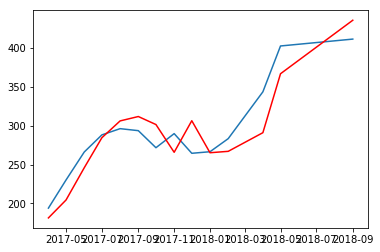

In [153]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df_norm.dropna(inplace=True)
X = df_norm['price'].values
print(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
# print('Test MSE: %.3f' % error)
# plot
pyplot.plot(df_norm['date'].values[size:len(X)], test)
pyplot.plot(df_norm['date'].values[size:len(X)], predictions, color='red')

